In [1]:
import cifar10
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
cifar10.data_path = "data/CIFAR-10/"

In [3]:
cifar10.maybe_download_and_extract()

Data has apparently already been downloaded and unpacked.


In [4]:
class_names = cifar10.load_class_names()
class_names

Loading data: data/CIFAR-10/cifar-10-batches-py/batches.meta


['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [5]:
images_train, cls_train, labels_train = cifar10.load_training_data()
images_test, cls_test, labels_test = cifar10.load_test_data()

Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_1
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_2
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_3
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_4
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_5
Loading data: data/CIFAR-10/cifar-10-batches-py/test_batch


In [6]:
print(images_train.shape)
print(images_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [7]:
cls_test

array([3, 8, 8, ..., 5, 1, 7])

In [8]:
labels_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

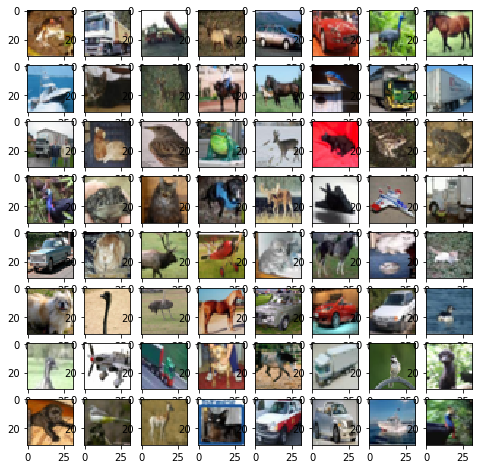

In [9]:
fig = plt.figure(figsize = (8,8))
for i in range(64):
    ax = fig.add_subplot(8,8,i+1)
    ax.imshow(images_train[i])
plt.show()

# Importing all required packages:

In [25]:
from sklearn.decomposition import PCA
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV,KFold,train_test_split
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

In [12]:
image_train_data = images_train.reshape((50000,3072))
image_test_data = images_test.reshape((10000,3072))

In [12]:
pca = PCA()
pca.fit(image_train_data)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [17]:
k=0
current_variance = 0
total_variance = sum(pca.explained_variance_)
while current_variance/total_variance < 0.999999:
    current_variance += pca.explained_variance_[k]
    k += 1
k

2997

In [18]:
tuned_pca = PCA(n_components = k,whiten = True)
transformed_train = tuned_pca.fit_transform(image_train_data)
transformed_test = tuned_pca.transform(image_test_data)

In [47]:
lg = LogisticRegression(C = 10)
lg.fit(transformed_train,cls_train)
lg.score(transformed_test,cls_test)

0.4035

In [48]:
rfc = RandomForestClassifier(n_estimators = 57 )
rfc.fit(transformed_train,cls_train)
rfc.score(transformed_test,cls_test)

0.348

In [54]:
gnb = GaussianNB()
gnb.fit(transformed_train,cls_train)
gnb.score(transformed_test,cls_test)

0.3142

In [56]:
bgc = BaggingClassifier()
bgc.fit(transformed_train,cls_train)
bgc.score(transformed_test,cls_test)

0.35

In [57]:
gbc = GradientBoostingClassifier()
gbc.fit(transformed_train,cls_train)
gbc.score(transformed_test,cls_test)

0.4564

In [19]:
mlp = MLPClassifier(activation = 'relu' ,hidden_layer_sizes =(3200,),max_iter = 1700)
mlp.fit(transformed_train,cls_train)
mlp.score(transformed_test,cls_test)

0.3446

In [ ]:
abc = AdaBoostClassifier()
abc.fit(transformed_train,cls_train)
abc.score(transformed_test,cls_test)

In [77]:
class_names

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [ ]:
def transform_output(l):
    output = []
    for i in l:
        if i==0:
            output.append('airplane')
        elif i==1:
            output.append('automobile')
        elif i==2:
            output.append('bird')
        elif i==3:
            output.append('cat')
        elif i==4:
            output.append('deer')
        elif i==5:
            output.append('dog')
        elif i==6:
            output.append('frog')
        elif i==7:
            output.append('horse')
        elif i==8:
            output.append('ship')
        else:
            output.append('truck')
    return output           

In [99]:
y_pred = transform_output(mlp.predict(transformed_test))

In [100]:
np.savetxt('image-prediction.csv',y_pred , fmt = '%s')

# TensorFlow

In [34]:
import tensorflow as tf

In [35]:
print(image_train_data.shape,labels_train.shape)
print(image_test_data.shape,labels_test.shape)

(50000, 3072) (50000, 10)
(10000, 3072) (10000, 10)


In [36]:
# weights & biases
n_input = 3072
n_hidden_1 = 1000
n_hidden_2 = 1000
n_classes = 10

weights = {
    'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_hidden_2, n_classes]))
}

biases = {
    'h1': tf.Variable(tf.random_normal([n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}


In [37]:
def forward_propagation(x, weights, biases):
    in_layer1 = tf.add(tf.matmul(x, weights['h1']), biases['h1'])
    out_layer1 = tf.nn.relu(in_layer1)
    
    in_layer2 = tf.add(tf.matmul(out_layer1, weights['h2']), biases['h2'])
    out_layer2 = tf.nn.relu(in_layer2)
    
    output = tf.add(tf.matmul(out_layer2, weights['out']), biases['out'])
    return output

In [38]:
x = tf.placeholder("float", [None, n_input])
y =tf.placeholder(tf.int32, [None, n_classes])
pred = forward_propagation(x, weights, biases)

In [39]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred, labels = y))

In [40]:
optimizer = tf.train.AdamOptimizer(learning_rate=0.01)
optimize = optimizer.minimize(cost)

In [41]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [ ]:
batch_size = 100
for i in range(25):
    num_batches = int(image_train_data.shape[0]/batch_size)
    total_cost = 0
    for j in range(num_batches):
        batch_x,_,batch_y,_ = train_test_split(image_train_data,labels_train,test_size = 0.99)
        c, _ = sess.run([cost,optimize], feed_dict={x:batch_x , y:batch_y})
        total_cost += c
    print(total_cost)

847771.320236206
73389.11402130127
40487.42212152481
1558.9672627449036
1218.9890973567963
1172.7796032428741
1158.3273952007294
1153.1841402053833
1220.245731830597
1187.4680018424988
1172.5220098495483
1186.1500525474548
1203.3211240768433
1187.9535918235779
1173.5179166793823
1169.1737296581268
1167.930115699768
1198.6875681877136
1200.369952917099
1181.8419976234436


In [ ]:
predictions = tf.argmax(pred, 1)
correct_labels = tf.argmax(y, 1)
correct_predictions = tf.equal(predictions, correct_labels)
predictions,correct_predictions  = sess.run([predictions, correct_predictions], feed_dict={x:image_test_data,
                                              y:labels_test})
correct_predictions.sum()

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(correct_labels,predictions)

In [ ]:
np.savetxt('image-prediction.csv',transform_output(correct_labels), fmt = '%s')